In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df.describe()

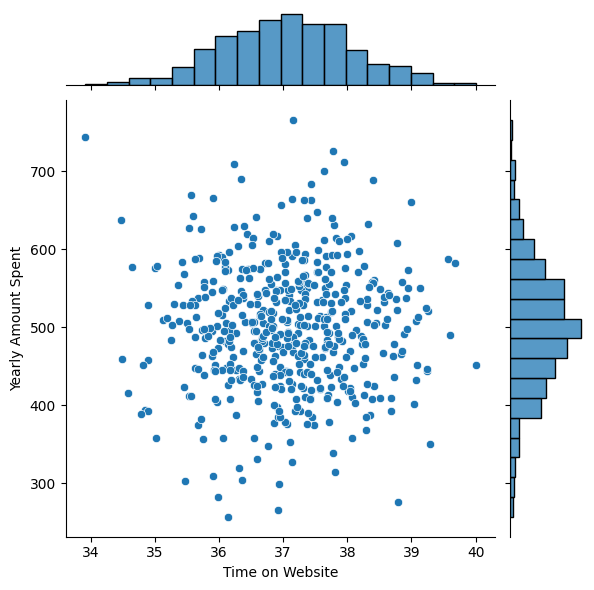

In [8]:
sns.jointplot(x= 'Time on Website', y= 'Yearly Amount Spent', data= df)

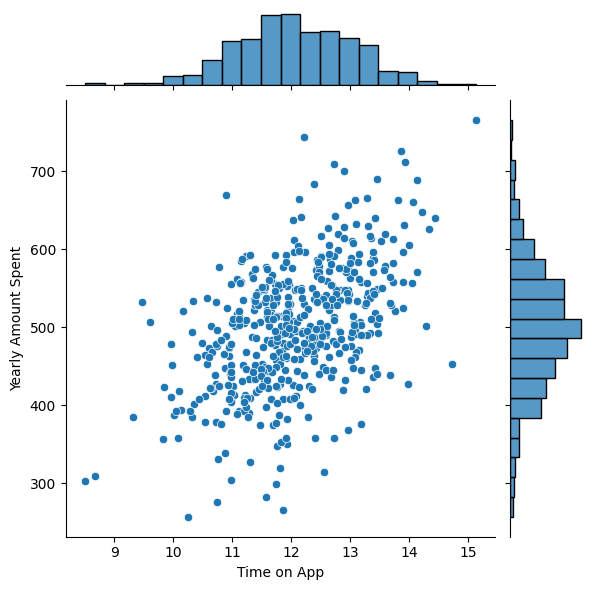

In [9]:
sns.jointplot(x= 'Time on App', y= 'Yearly Amount Spent', data= df)

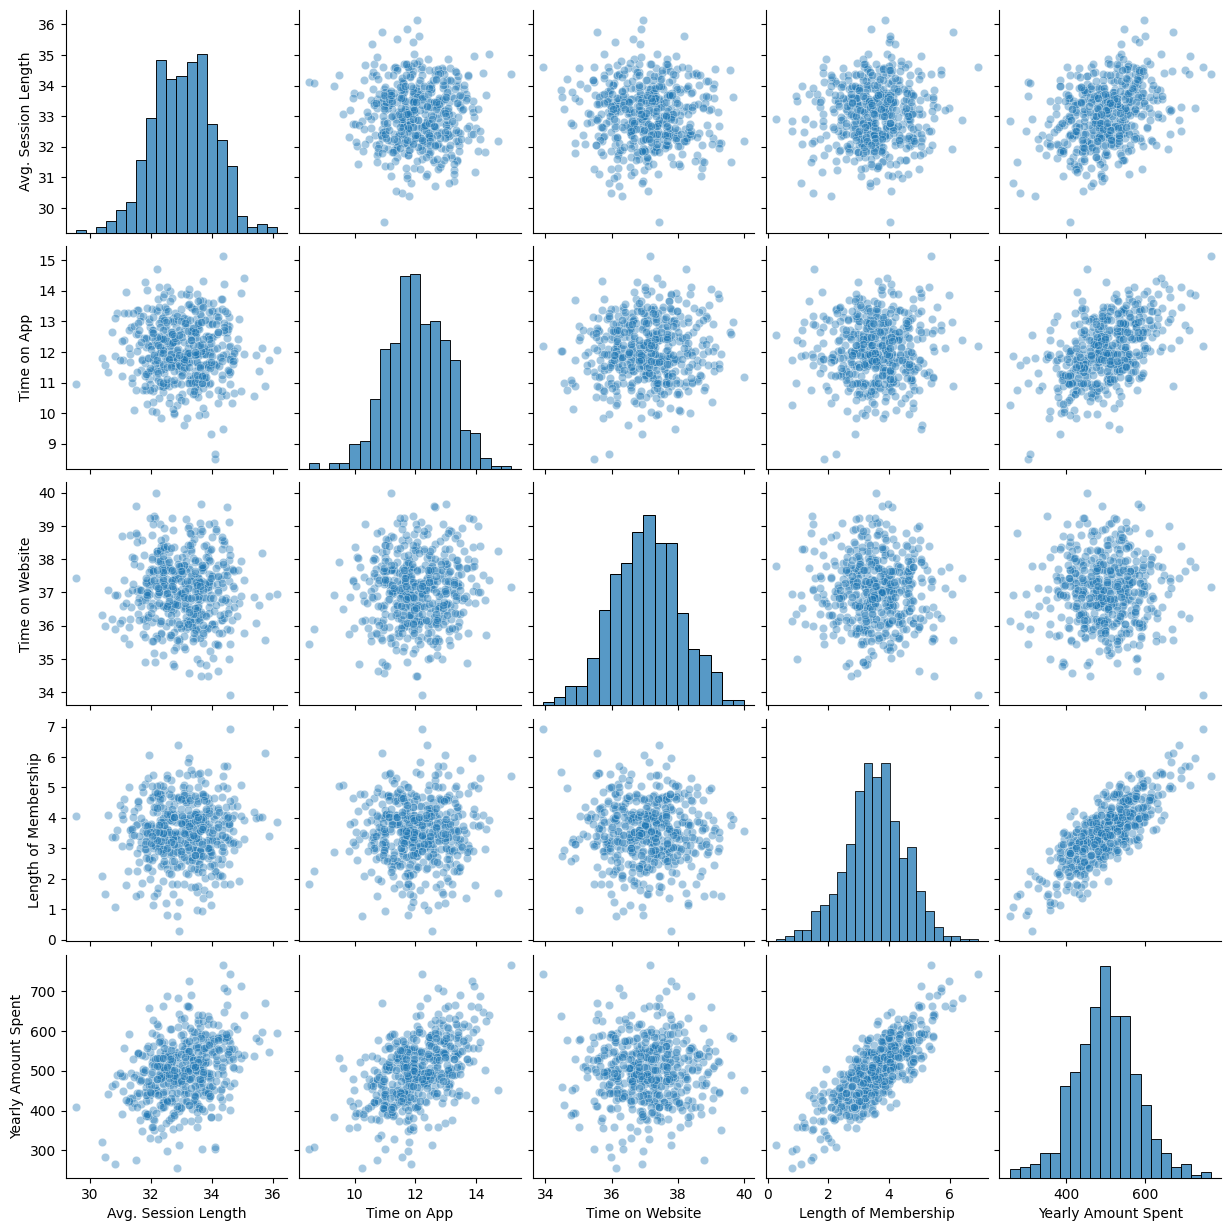

In [11]:
sns.pairplot(df , kind = 'scatter' , plot_kws= {'alpha': 0.4})


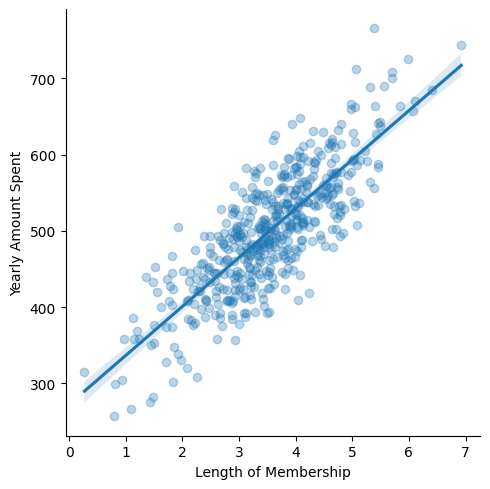

In [18]:
sns.lmplot(x= 'Length of Membership', y= 'Yearly Amount Spent', data= df , scatter_kws={'alpha' : 0.3})

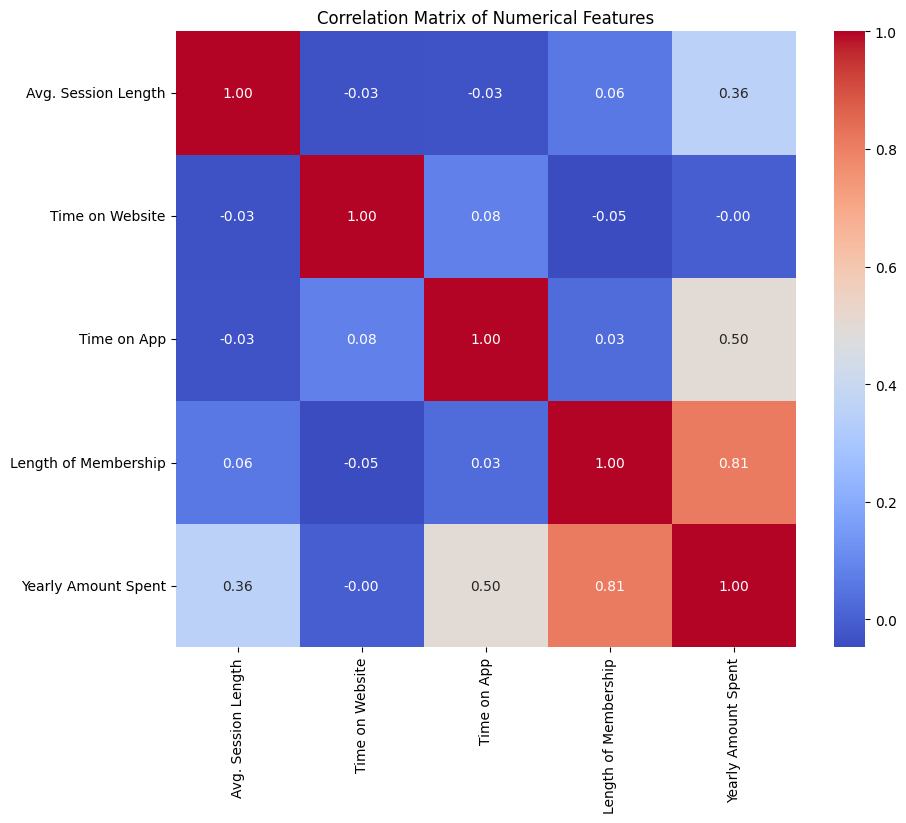

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split as tts
x = df[['Avg. Session Length', 'Time on Website','Time on App','Yearly Amount Spent']]
y = df['Yearly Amount Spent']
x_train , x_test , y_train , y_test = tts(x ,y ,test_size = 0.3 ,random_state = 42)


In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [38]:
predeicttions = lr.predict(x_test)

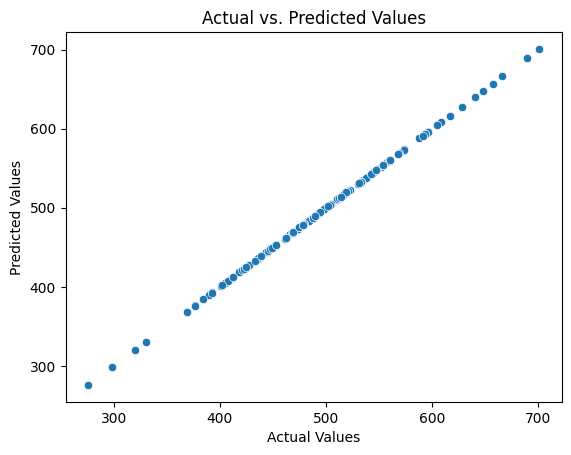

In [41]:
sns.scatterplot(x= y_test , y= predeicttions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
print('Mean Absolute Error:', mean_absolute_error(y_test, predeicttions))
print('Mean Squared Error:', mean_squared_error(y_test, predeicttions))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, predeicttions)))

Mean Absolute Error: 3.410605131648481e-14
Mean Squared Error: 2.9726803263624433e-27
Root Mean Squared Error: 5.4522292013106376e-14


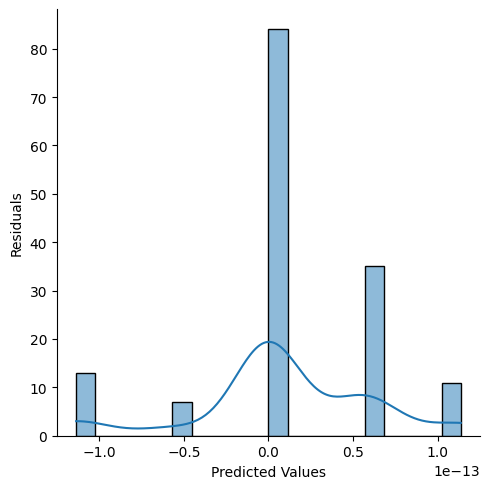

In [50]:
residuals = y_test - predeicttions
sns.displot(residuals , bins = 20 , kde = True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()